In [619]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

In [620]:
df = pd.read_csv('/content/accident.csv')
df

,Age,Gender,Speed_of_Impact,Helmet_Used,Seatbelt_Used,Survived
0,56,Female,27.0,No,No,1
1,69,Female,46.0,No,Yes,1
2,46,Male,46.0,Yes,Yes,0
3,32,Male,117.0,No,Yes,0
4,60,Female,40.0,Yes,Yes,0
...,...,...,...,...,...,...
195,69,Female,111.0,No,Yes,1
196,30,Female,51.0,No,Yes,1
197,58,Male,110.0,No,Yes,1
198,20,Male,103.0,No,Yes,1


In [621]:
df.head()

,Age,Gender,Speed_of_Impact,Helmet_Used,Seatbelt_Used,Survived
0,56,Female,27.0,No,No,1
1,69,Female,46.0,No,Yes,1
2,46,Male,46.0,Yes,Yes,0
3,32,Male,117.0,No,Yes,0
4,60,Female,40.0,Yes,Yes,0


In [622]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 196 entries, 0 to 199
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              196 non-null    int64  
 1   Gender           196 non-null    object 
 2   Speed_of_Impact  196 non-null    float64
 3   Helmet_Used      196 non-null    object 
 4   Seatbelt_Used    196 non-null    object 
 5   Survived         196 non-null    int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 10.7+ KB


In [623]:
df['Helmet_Used'].value_counts()

,count
Helmet_Used,
Yes,109
No,87


In [624]:
non_survivors = df[df["Survived"] == 0]
survivors = df[df["Survived"] == 1]

In [625]:
average_age_non_survivors = non_survivors['Age'].mean()
print(f"Average age of non-surviving accident victims: {average_age_non_survivors:.2f} years")

Average age of non-surviving accident victims: 41.52 years


In [626]:
non_survivor_gender = non_survivors["Gender"].value_counts()
male_to_female = non_survivor_gender["Male"] / non_survivor_gender["Female"]
print("the proportion of male to female accident victims = ", male_to_female)

the proportion of male to female accident victims =  0.6271186440677966


In [627]:
bins = [0, 18, 35, 50, 65, 100]
labels = ['0-18', '19-35', '36-50', '51-65', '66+']
non_survivors['AgeGroup'] = pd.cut(non_survivors['Age'], bins=bins, labels=labels, right=False)

age_group_counts_non_survivors = non_survivors['AgeGroup'].value_counts().sort_index()
print("Accidents by age group among non-survivors:")
print(age_group_counts_non_survivors)

Accidents by age group among non-survivors:
AgeGroup
0-18      0
19-35    36
36-50    28
51-65    29
66+       3
Name: count, dtype: int64


<ipython-input-627-6153bd7dfd50>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_survivors['AgeGroup'] = pd.cut(non_survivors['Age'], bins=bins, labels=labels, right=False)


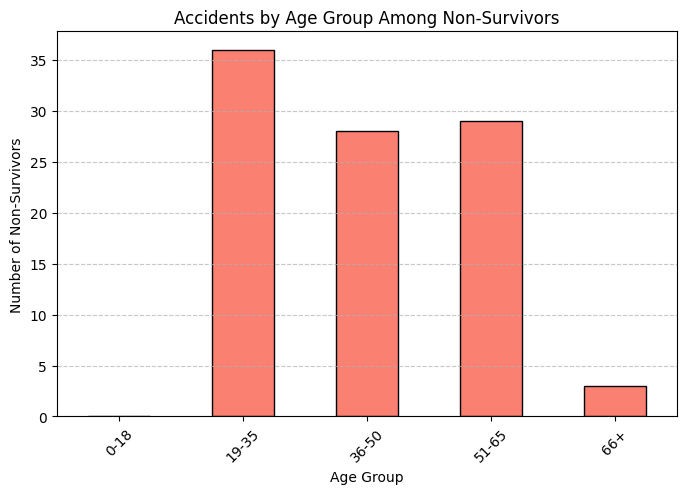

In [628]:
plt.figure(figsize=(8, 5))
age_group_counts_non_survivors.plot(kind='bar', color='salmon', edgecolor='black')

plt.xlabel("Age Group")
plt.ylabel("Number of Non-Survivors")
plt.title("Accidents by Age Group Among Non-Survivors")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [629]:
from math import sqrt

df['Helmet_Used'] = df['Helmet_Used'].map({'Yes': 1, 'No': 0})
contingency_table = pd.crosstab(df['Helmet_Used'], df['Survived'])


chi2, p, dof, expected = chi2_contingency(contingency_table)
n = contingency_table.sum().sum()
phi_coefficient = sqrt(chi2 / n)

print(f"Chi-Square Value: {chi2:.3f}")
print(f"P-Value: {p:.3f}")
print(f"Phi Coefficient: {phi_coefficient:.3f}")

if p < 0.05:
    print("There is a statistically significant relationship between helmet usage and survival.")
else:
    print("No significant relationship between helmet usage and survival.")

if abs(phi_coefficient) < 0.1:
    print("Very weak or no correlation.")
elif abs(phi_coefficient) < 0.3:
    print("Weak correlation between helmet usage and survival.")
elif abs(phi_coefficient) < 0.5:
    print("Moderate correlation between helmet usage and survival.")
else:
    print("Strong correlation between helmet usage and survival.")


Chi-Square Value: 0.369
P-Value: 0.544
Phi Coefficient: 0.043
No significant relationship between helmet usage and survival.
Very weak or no correlation.


In [630]:
Seatbelt_non_survivors = non_survivors[non_survivors["Seatbelt_Used"] == "Yes"].shape[0]
total_Seatbelt_wearers = df[df["Seatbelt_Used"] == "Yes"].shape[0]
Seatbelt_non_survival_rate = (Seatbelt_non_survivors / total_Seatbelt_wearers) * 100
print(f"\npercentage of accident victims were wearing seatbelts {Seatbelt_non_survival_rate:.2f}%")


percentage of accident victims were wearing seatbelts 46.36%


Chi-Square Value: 0.469
P-Value: 0.494
Phi Coefficient: 0.049
No significant relationship between seatbelt usage and survival.
Very weak or no correlation.


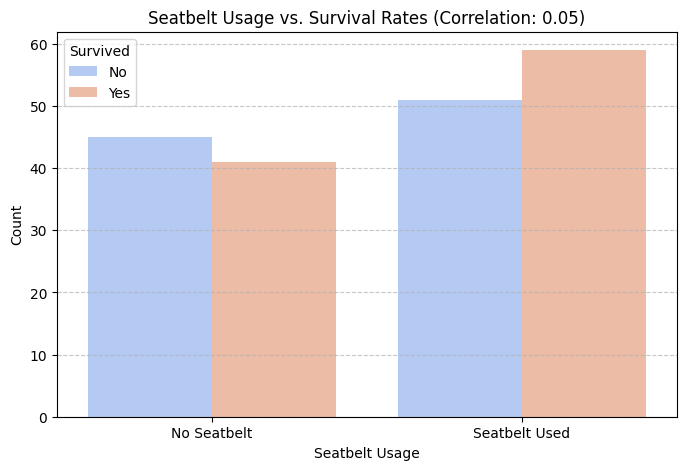

In [631]:

df['Seatbelt_Used'] = df['Seatbelt_Used'].map({'Yes': 1, 'No': 0})
contingency_table = pd.crosstab(df['Seatbelt_Used'], df['Survived'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

n = contingency_table.sum().sum()
phi_coefficient = sqrt(chi2 / n)


print(f"Chi-Square Value: {chi2:.3f}")
print(f"P-Value: {p:.3f}")
print(f"Phi Coefficient: {phi_coefficient:.3f}")

if p < 0.05:
    print("There is a statistically significant relationship between seatbelt usage and survival.")
else:
    print("No significant relationship between seatbelt usage and survival.")

if abs(phi_coefficient) < 0.1:
    print("Very weak or no correlation.")
elif abs(phi_coefficient) < 0.3:
    print("Weak correlation between seatbelt usage and survival.")
elif abs(phi_coefficient) < 0.5:
    print("Moderate correlation between seatbelt usage and survival.")
else:
    print("Strong correlation between seatbelt usage and survival.")


plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Seatbelt_Used', hue='Survived', palette="coolwarm")

plt.xticks([0, 1], ['No Seatbelt', 'Seatbelt Used'])
plt.xlabel("Seatbelt Usage")
plt.ylabel("Count")
plt.title(f"Seatbelt Usage vs. Survival Rates (Correlation: {phi_coefficient:.2f})")
plt.legend(title="Survived", labels=["No", "Yes"])
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [632]:
non_survivor_Helmet_Used= non_survivors["Helmet_Used"].value_counts()
non_survivor_Seatbelt_Used= non_survivors["Seatbelt_Used"].value_counts()
survivor_Helmet_Used= survivors["Helmet_Used"].value_counts()
survivor_Seatbelt_Used= survivors["Seatbelt_Used"].value_counts()
die = non_survivor_Seatbelt_Used["Yes"] + non_survivor_Helmet_Used["Yes"]
non= survivor_Seatbelt_Used["Yes"] + survivor_Helmet_Used["Yes"]
print("Victims = ",die)
print("The precentage of their survival outcomes= ", (die / non)*100)


Victims =  107
The precentage of their survival outcomes=  95.53571428571429


Total victims who used both a helmet and a seatbelt: 66
Survivors: 32
Non-survivors: 34


<ipython-input-633-8baf66b32867>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Survived', 'Not Survived'], y=[survived_victims, not_survived_victims], palette=['green', 'red'])


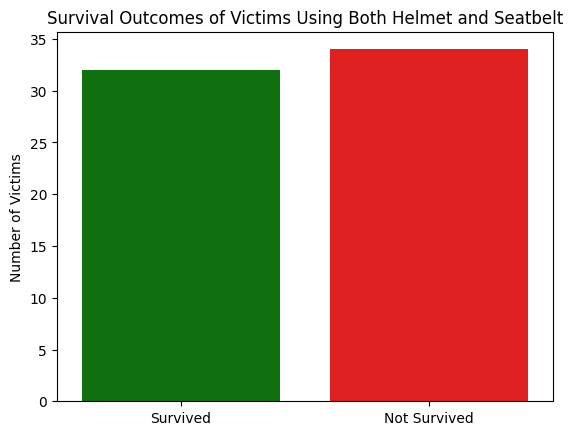

In [633]:

helmet_seatbelt_users = df[(df['Helmet_Used'] == 1) & (df['Seatbelt_Used'] == 1)]
total_victims = helmet_seatbelt_users.shape[0]
survived_victims = helmet_seatbelt_users[helmet_seatbelt_users['Survived'] == 1].shape[0]
not_survived_victims = total_victims - survived_victims
print(f"Total victims who used both a helmet and a seatbelt: {total_victims}")
print(f"Survivors: {survived_victims}")
print(f"Non-survivors: {not_survived_victims}")
sns.barplot(x=['Survived', 'Not Survived'], y=[survived_victims, not_survived_victims], palette=['green', 'red'])
plt.ylabel('Number of Victims')
plt.title('Survival Outcomes of Victims Using Both Helmet and Seatbelt')
plt.show()

In [634]:
max_speed = df["Speed_of_Impact"].max()
max_speed_data = df[df["Speed_of_Impact"] == max_speed]

speed_bins = pd.cut(df["Speed_of_Impact"], bins=10)
survival_rates = df.groupby(speed_bins)["Survived"].mean()

# Display results
print(f"Highest recorded speed of impact: {max_speed} km/h")
print("Details of accidents at highest speed:")
max_speed_data



<ipython-input-634-0869dc7840d1>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_rates = df.groupby(speed_bins)["Survived"].mean()


Highest recorded speed of impact: 119.0 km/h
Details of accidents at highest speed:


,Age,Gender,Speed_of_Impact,Helmet_Used,Seatbelt_Used,Survived
174,24,Female,119.0,1,1,0
180,62,Female,119.0,1,1,1


In [635]:
print("\nSurvival rates across different speed ranges:")
survival_rates


Survival rates across different speed ranges:


,Survived
Speed_of_Impact,
"(19.901, 29.9]",0.368421
"(29.9, 39.8]",0.523810
"(39.8, 49.7]",0.458333
"(49.7, 59.6]",0.642857
"(59.6, 69.5]",0.500000
"(69.5, 79.4]",0.521739
"(79.4, 89.3]",0.592593
"(89.3, 99.2]",0.400000
"(99.2, 109.1]",0.375000


In [636]:
survival_by_gender = df.groupby("Gender")["Survived"].mean()

higher_survival_gender = survival_by_gender.idxmax()
higher_survival_rate = survival_by_gender.max()

print("Survival rates by gender:")
print(survival_by_gender)



Survival rates by gender:
Gender
Female    0.458716
Male      0.574713
Name: Survived, dtype: float64


In [637]:
print(f"\nThe gender with the highest survival rate: {higher_survival_gender} ({higher_survival_rate:.2%})")


The gender with the highest survival rate: Male (57.47%)


In [638]:
age_bins = [0, 18, 30, 40, 50, 60, 70, 100]  # Age ranges
age_labels = ["0-18", "19-30", "31-40", "41-50", "51-60", "61-70", "71+"]

# Create a new column for age groups
df["Age_Group"] = pd.cut(df["Age"], bins=age_bins, labels=age_labels, right=False)

# Calculate survival rates by age group
survival_by_age = df.groupby("Age_Group")["Survived"].mean()

# Determine the youngest and oldest survival rates
youngest_group = survival_by_age.idxmax()
oldest_group = survival_by_age.idxmin()

# Display results
print("Survival rates by age group:")
survival_by_age



Survival rates by age group:


<ipython-input-638-7cdd33c2488a>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_by_age = df.groupby("Age_Group")["Survived"].mean()


,Survived
Age_Group,
0-18,NaN
19-30,0.422222
31-40,0.470588
41-50,0.500000
51-60,0.595238
61-70,0.571429
71+,NaN


In [639]:
print(f"\nAge group with the highest survival rate: {youngest_group}")
print(f"Age group with the lowest survival rate: {oldest_group}")


Age group with the highest survival rate: 51-60
Age group with the lowest survival rate: 19-30


In [640]:
df["Used_Safety"] = (df["Helmet_Used"] == "Yes") | (df["Seatbelt_Used"] == "Yes")
survival_by_safety = df.groupby("Used_Safety")["Survived"].mean()

count_by_safety = df["Used_Safety"].value_counts()

print("Survival rates based on safety measure usage:")
survival_by_safety



Survival rates based on safety measure usage:


,Survived
Used_Safety,
False,0.510204


In [641]:
print("\nNumber of accidents by safety measure usage:")
count_by_safety


Number of accidents by safety measure usage:


,count
Used_Safety,
False,196


In [642]:
age_bins = [0, 18, 30, 40, 50, 60, 70, 100]
age_labels = ["0-18", "19-30", "31-40", "41-50", "51-60", "61-70", "71+"]

df["Age_Group"] = pd.cut(df["Age"], bins=age_bins, labels=age_labels, right=False)

survival_by_gender_age = df.groupby(["Gender", "Age_Group"])["Survived"].mean().unstack()
highest_survival = survival_by_gender_age.max().max()
lowest_survival = survival_by_gender_age.min().min()
highest_group = survival_by_gender_age.stack().idxmax()
lowest_group = survival_by_gender_age.stack().idxmin()

# Display results
print("Survival rates by gender and age group:")
survival_by_gender_age



Survival rates by gender and age group:


<ipython-input-642-082b94d2bacc>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_by_gender_age = df.groupby(["Gender", "Age_Group"])["Survived"].mean().unstack()


Age_Group,0-18,19-30,31-40,41-50,51-60,61-70,71+
Gender,,,,,,,
Female,NaN,0.28,0.333333,0.473684,0.615385,0.571429,NaN
Male,NaN,0.60,0.625000,0.523810,0.562500,0.571429,NaN


In [643]:
print(f"\nHighest survival rate: {highest_survival:.2%} in {highest_group}")
print(f"Lowest survival rate: {lowest_survival:.2%} in {lowest_group}")


Highest survival rate: 62.50% in ('Male', '31-40')
Lowest survival rate: 28.00% in ('Female', '19-30')
